<center><b>Chatura Samarasinghe<br>Manifold Learning - tSNE, LLE, Isomap</b></center>

In [2]:
from sklearn.datasets import fetch_mldata
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_mldata('MNIST original')

In [4]:
data = mnist.data[::30]
target = mnist.target[::30]

In [ ]:
# function to plot digits
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # scale
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

<b>t_sne on MNIST</b>

In [22]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2)
proj = model.fit_transform(data)

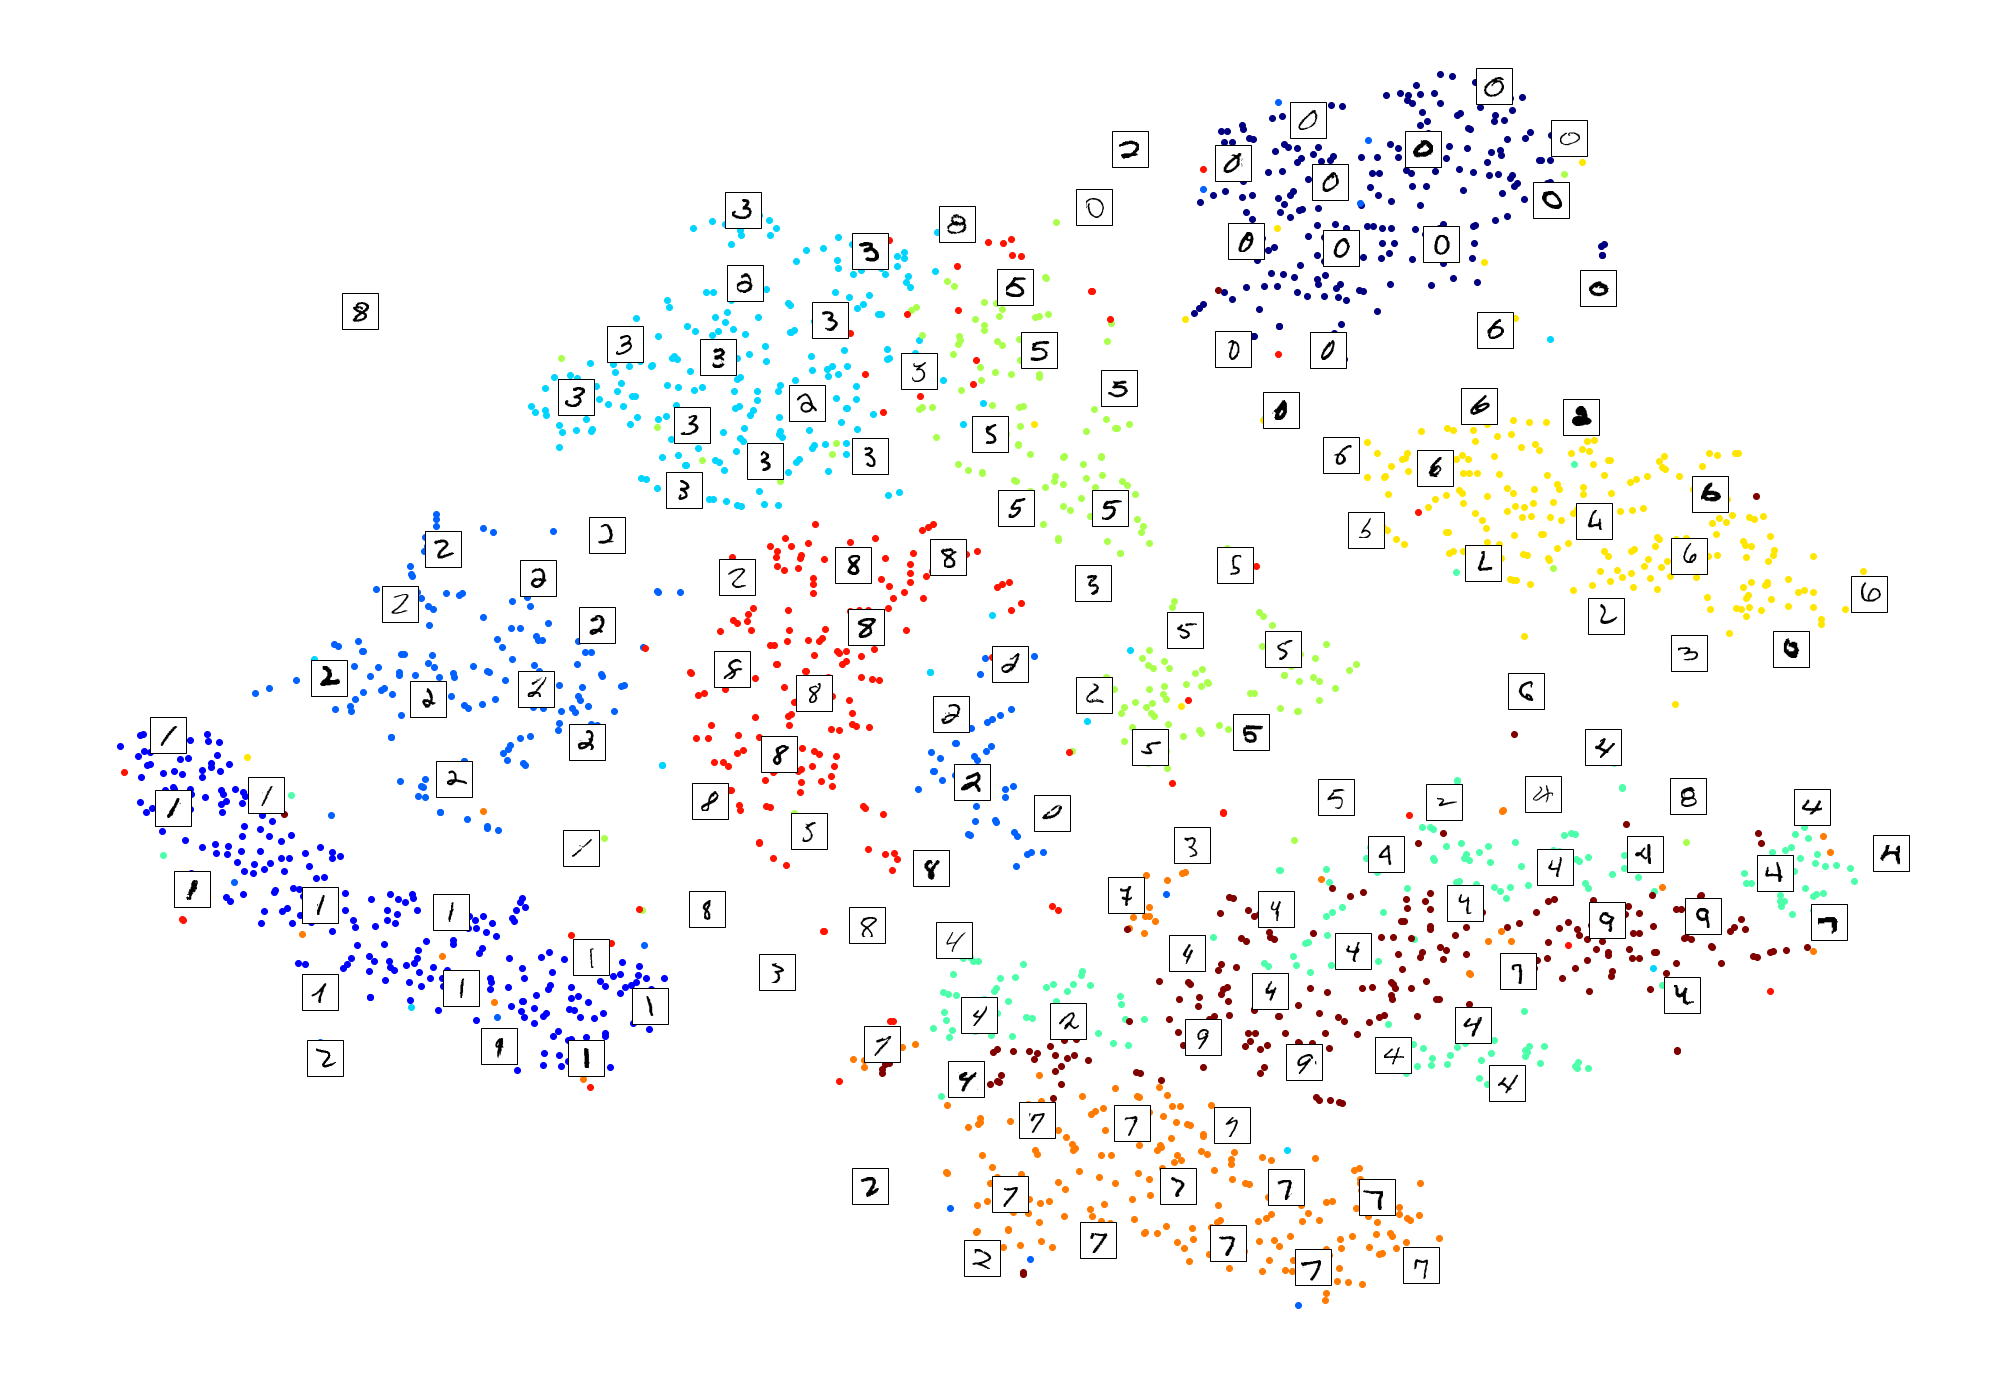

In [23]:
plot_digits(proj,target, images=data, figsize=(35,25))

<b>LLE on MNIST</b>

In [25]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_components=2, n_neighbors=2)
proj = model.fit_transform(data)

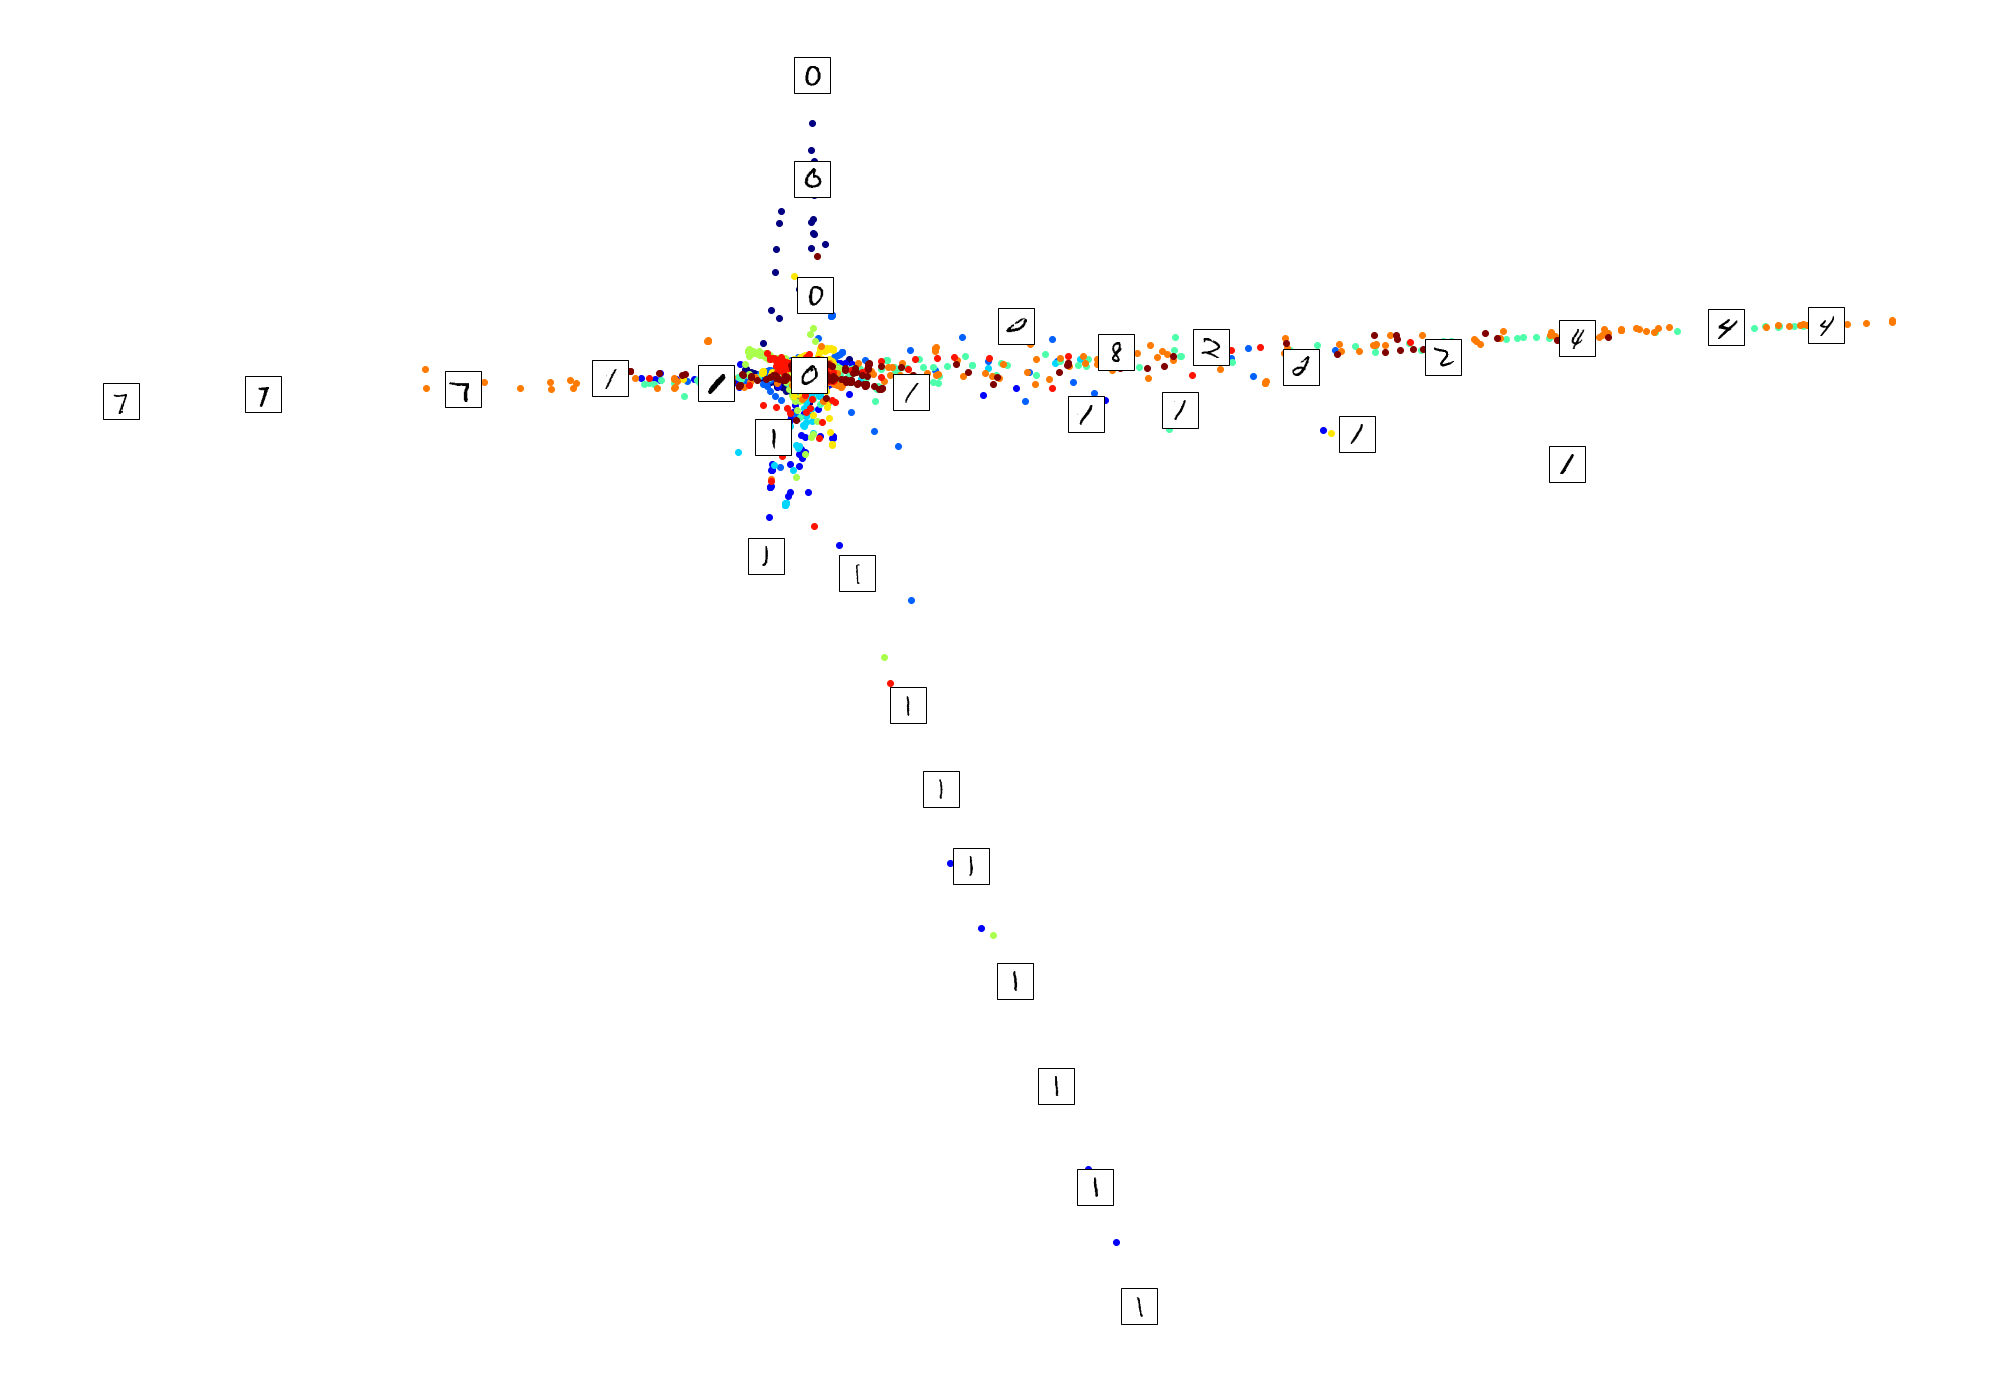

In [26]:
plot_digits(proj,target, images=data, figsize=(35,25))

<b> Isomap on MNIST </b>

In [28]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2, n_neighbors=10)
proj = model.fit_transform(data)

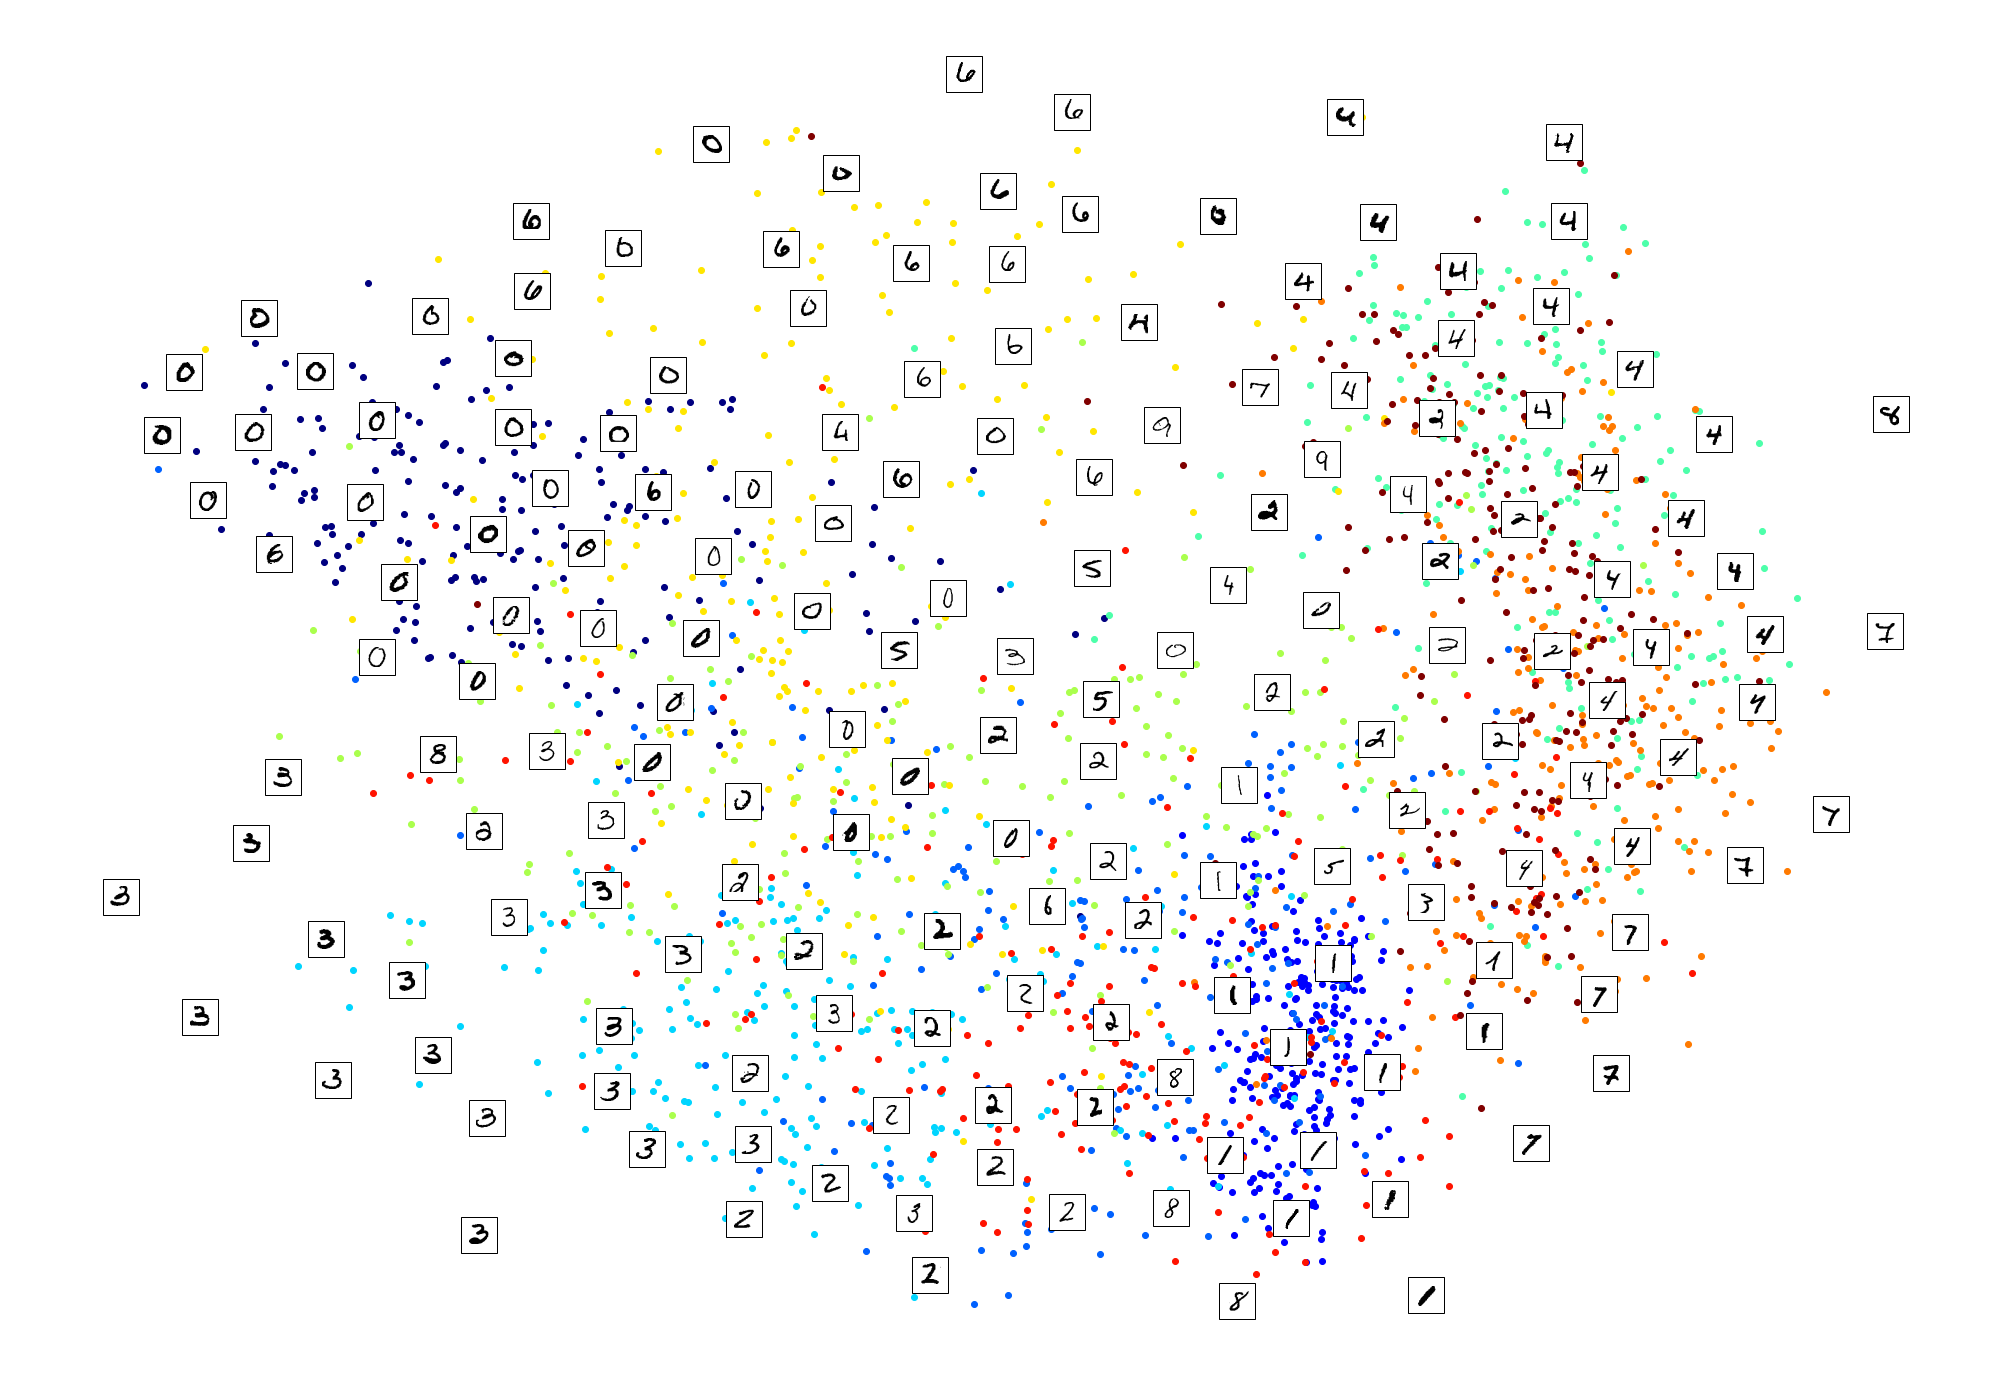

In [29]:
plot_digits(proj,target, images=data, figsize=(35,25))